In [ ]:
# Import libraries
import tensorflow as tf  
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [ ]:
# Load the data
X_train = np.load('trnImage.npy')
y_train = np.load('trnLabel.npy')

X_test = np.load('tstImage.npy')
y_test = np.load('tstLabel.npy')

# Data Preperation

In [ ]:
# Rearranging X_train and y_train
X_train = np.transpose(X_train, (3, 0, 1, 2))
X_test = np.transpose(X_test, (3, 0, 1, 2))

In [ ]:
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (10000, 32, 32, 3)
y_train.shape: (10000, 1)
X_test.shape: (1000, 32, 32, 3)
y_test.shape: (1000, 1)


In [ ]:
# Flatten y_train
y_train = y_train.reshape(-1,)

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'dear', 'frog', 'horse', 'ship', 'truck']

In [ ]:
def plot_image(x, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X_train[3])
    plt.xlabel(classes[y[index]])

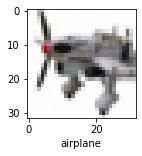

In [ ]:
plot_image(X_train, y_train, 3)

In [ ]:
# Normalize the data
X_train = X_train/255
X_test = X_test/255

# Neural Network

In [ ]:
nn = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

nn.compile(optimizer='SGD',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])
nn.fit(X_train, y_train, epochs=100)

Epoch 1/100
313/313 [==============================] - 21s 66ms/step - loss: 2.3020 - accuracy: 0.1116
Epoch 2/100
313/313 [==============================] - 20s 64ms/step - loss: 2.3013 - accuracy: 0.1396
Epoch 3/100
313/313 [==============================] - 20s 65ms/step - loss: 2.3009 - accuracy: 0.1397
Epoch 4/100
313/313 [==============================] - 21s 66ms/step - loss: 2.3007 - accuracy: 0.1389
Epoch 5/100
313/313 [==============================] - 20s 65ms/step - loss: 2.3006 - accuracy: 0.1450
Epoch 6/100
313/313 [==============================] - 21s 67ms/step - loss: 2.3004 - accuracy: 0.1584
Epoch 7/100
313/313 [==============================] - 21s 66ms/step - loss: 2.3002 - accuracy: 0.1440
Epoch 8/100
313/313 [==============================] - 27s 87ms/step - loss: 2.3000 - accuracy: 0.1550
Epoch 9/100
313/313 [==============================] - 21s 68ms/step - loss: 2.2999 - accuracy: 0.1456
Epoch 10/100
313/313 [==============================] - 21s 68ms/step - l

313/313 [==============================] - 22s 69ms/step - loss: 2.2111 - accuracy: 0.2059
Epoch 80/100
313/313 [==============================] - 22s 71ms/step - loss: 2.2067 - accuracy: 0.2034
Epoch 81/100
313/313 [==============================] - 22s 69ms/step - loss: 2.2028 - accuracy: 0.2050
Epoch 82/100
313/313 [==============================] - 22s 72ms/step - loss: 2.1994 - accuracy: 0.2017
Epoch 83/100
313/313 [==============================] - 21s 67ms/step - loss: 2.1954 - accuracy: 0.2082
Epoch 84/100
313/313 [==============================] - 21s 67ms/step - loss: 2.1914 - accuracy: 0.2048
Epoch 85/100
313/313 [==============================] - 22s 70ms/step - loss: 2.1876 - accuracy: 0.2017
Epoch 86/100
313/313 [==============================] - 22s 69ms/step - loss: 2.1838 - accuracy: 0.2050
Epoch 87/100
313/313 [==============================] - 21s 67ms/step - loss: 2.1806 - accuracy: 0.2096
Epoch 88/100
313/313 [==============================] - 21s 67ms/step - loss:

In [ ]:
nn.evaluate(X_test, y_test)

32/32 [==============================] - 1s 19ms/step - loss: 2.1454 - accuracy: 0.2090


[2.145352363586426, 0.20900000631809235]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = nn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification Report: \n', classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.24      0.54      0.33       100
           1       0.23      0.14      0.17       100
           2       0.11      0.04      0.06       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.12      0.35      0.18       100
           6       0.22      0.51      0.31       100
           7       0.00      0.00      0.00       100
           8       0.33      0.41      0.37       100
           9       0.25      0.10      0.14       100

    accuracy                           0.21      1000
   macro avg       0.15      0.21      0.16      1000
weighted avg       0.15      0.21      0.16      1000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Convolutional Neural Network

In [ ]:
cnn = models.Sequential([
    # CNN Layers
    layers.Conv2D(filters=32, activation='relu', kernel_size=(3,3), input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, activation='relu', kernel_size=(3,3)),
    layers.MaxPooling2D((2, 2)),
    
    # Dense Layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=100)

Epoch 1/100
313/313 [==============================] - 10s 30ms/step - loss: 2.3019 - accuracy: 0.1097
Epoch 2/100
313/313 [==============================] - 9s 29ms/step - loss: 2.1885 - accuracy: 0.1905
Epoch 3/100
313/313 [==============================] - 9s 30ms/step - loss: 2.1039 - accuracy: 0.2340
Epoch 4/100
313/313 [==============================] - 9s 29ms/step - loss: 2.0745 - accuracy: 0.2507
Epoch 5/100
313/313 [==============================] - 9s 28ms/step - loss: 2.0521 - accuracy: 0.2620
Epoch 6/100
313/313 [==============================] - 9s 29ms/step - loss: 2.0326 - accuracy: 0.2676
Epoch 7/100
313/313 [==============================] - 9s 29ms/step - loss: 2.0164 - accuracy: 0.2712
Epoch 8/100
313/313 [==============================] - 9s 28ms/step - loss: 1.9991 - accuracy: 0.2768
Epoch 9/100
313/313 [==============================] - 9s 29ms/step - loss: 1.9819 - accuracy: 0.2851
Epoch 10/100
313/313 [==============================] - 9s 30ms/step - loss: 1.96

313/313 [==============================] - 9s 30ms/step - loss: 1.6151 - accuracy: 0.4256
Epoch 81/100
313/313 [==============================] - 9s 29ms/step - loss: 1.6067 - accuracy: 0.4285
Epoch 82/100
313/313 [==============================] - 9s 29ms/step - loss: 1.6084 - accuracy: 0.4287
Epoch 83/100
313/313 [==============================] - 9s 29ms/step - loss: 1.6062 - accuracy: 0.4304
Epoch 84/100
313/313 [==============================] - 9s 29ms/step - loss: 1.6046 - accuracy: 0.4331
Epoch 85/100
313/313 [==============================] - 9s 29ms/step - loss: 1.6022 - accuracy: 0.4328
Epoch 86/100
313/313 [==============================] - 9s 29ms/step - loss: 1.5998 - accuracy: 0.4337
Epoch 87/100
313/313 [==============================] - 9s 29ms/step - loss: 1.5969 - accuracy: 0.4365
Epoch 88/100
313/313 [==============================] - 9s 29ms/step - loss: 1.6005 - accuracy: 0.4311
Epoch 89/100
313/313 [==============================] - 9s 29ms/step - loss: 1.5966 - 

In [ ]:
cnn.evaluate(X_test, y_test)

32/32 [==============================] - 0s 9ms/step - loss: 1.6959 - accuracy: 0.4050


[1.6959182024002075, 0.4050000011920929]

# Test CNN on isolated samples

In [ ]:
# Flatten y_test
y_test = y_test.reshape(-1,)

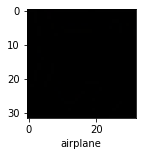

In [ ]:
plot_image(X_test, y_test, 1)

In [ ]:
y_pred = cnn.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[0, 0, 9, 0, 0, 0, 0, 7, 8, 0]

In [ ]:
y_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
classes[y_classes[8]]

'truck'

In [ ]:
print('Classification Report: \n', classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.41      0.59      0.48       100
           1       0.53      0.31      0.39       100
           2       0.31      0.30      0.31       100
           3       0.38      0.13      0.19       100
           4       0.35      0.39      0.37       100
           5       0.45      0.33      0.38       100
           6       0.38      0.62      0.47       100
           7       0.35      0.33      0.34       100
           8       0.43      0.60      0.50       100
           9       0.51      0.45      0.48       100

    accuracy                           0.41      1000
   macro avg       0.41      0.40      0.39      1000
weighted avg       0.41      0.41      0.39      1000



The test accuracy fo ANN fo 100 epochs was 21% whereas, the test accuracy of CNN for same number of epochs was 41%. Although, the accuracy for CNN was nuch better then that of ANN, but it is still very very low. The reason for such low accuracy is that the dataset is not ver simple. Plus, the available dataset is also very little

Also, the computation  speed of CNN is also very low compared to the ANN